In [1]:
# %%bash
# pip install selenium;
# pip install matplotlib;

ABOUT - Responsibly Ventures
https://www.responsibly.vc/about
shared.ada.skipToMainContent HOME ABOUT MEDIA APPLY Who are we? The emergence of new forms of Social and Sustainable Tech will disrupt society in a good way. Our mission is to back remarkable teams focused on Venture Scale Positive Impacts . We are a PreSeed VC Impact Fund who stands behind our Founders, supporting the optionality needed to reach venture scale exits, while reducing impact-risks. We actively promote all forms of positive impact as a core value driver--e.g., diversity, inclusion, empathy, social responsibility, ethics, customer love, humane actions, a focus on both people & planet. We seek opportunities with multiple Sustainable Development Goals (SDGs) per startup, as a guidepost in our decision making process. Our fund steers away from obvious vice categories, and non-obvious , as much as we can. We're here to support our Founders in realizing the future they envision, together! Zécca J. Lehn General Partner

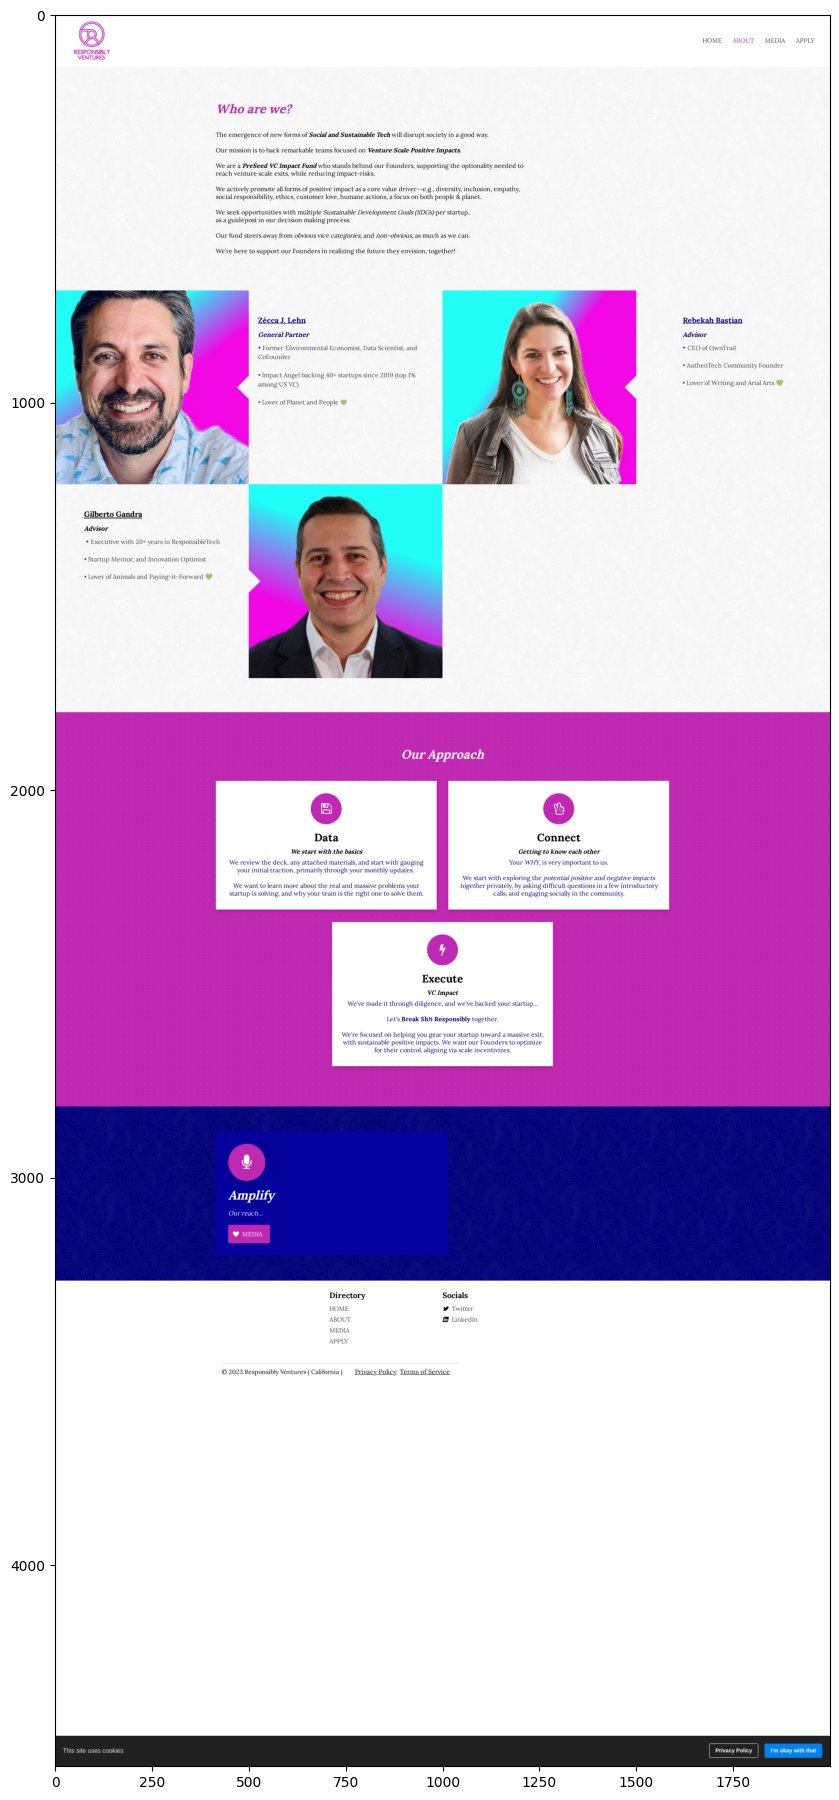

In [1]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.proxy import Proxy, ProxyType
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import logging
import os
import re
from bs4 import BeautifulSoup

######### INPUTS ##########

url = 'https://www.responsibly.vc/about'

page_type = 'full' # "full" | "scroll"
show_screen = True

############

options=webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument('--disable-popup-blocking') 
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

proxy = Proxy({
    'proxyType': ProxyType.MANUAL,
  #             'httpProxy': ourProxy,
  #             'ftpProxy' : ourProxy,
  #             'sslProxy' : ourProxy,
              'noProxy'  : ''
  })

# Configure capabilities 
capabilities = dict(DesiredCapabilities.CHROME)
proxy.add_to_capabilities(capabilities)

driver = webdriver.Remote(
   command_executor='http://selenium:4444/wd/hub',
   options=options
)

driver.get(url)

try:
    print(driver.title)

    # Create full page screenshot
    path_to_screenshot = 'data/screenshot.png'
    
    if not os.path.exists('data'):
        os.makedirs('data')
    if os.path.exists(path_to_screenshot):
        os.remove(path_to_screenshot)
        
    ###
    
    if page_type == 'scroll' and show_screen == True:
        
        # Note: Action of scrolling
        html = driver.find_element(By.XPATH,'//body')
        total_scrolled = 0
        page_height = driver.execute_script("return document.body.scrollHeight")
        print(page_height)
        while total_scrolled < page_height:
            html.send_keys(Keys.PAGE_DOWN)
            total_scrolled += 300
            time.sleep(.1)
        driver.save_screenshot(path_to_screenshot)
        image = mpimg.imread(path_to_screenshot)
        plt.figure(figsize=(10, 50))
        plt.imshow(image)

    if page_type == 'full'and show_screen == True:
        
        # Take full page screengrab
        element = driver.find_element(By.TAG_NAME, 'body')
        total_height = element.size["height"] + 1000
        driver.set_window_size(2000, total_height)
        time.sleep(3)
        driver.save_screenshot(path_to_screenshot)
        image = mpimg.imread(path_to_screenshot)
        plt.figure(figsize=(10, 50))
        plt.imshow(image)
    
    # Find page source data
    html = driver.page_source
    soup = BeautifulSoup(html)
    textdata = soup.findAll(text=True)
    # print(textdata) # unstructured
    
    textresult = []
    def visible(element): 
        if element.parent.name in ['style', 'script', '[document]','head', 'title', 'div','li']:
            return False 
        elif re.match('<!--.*-->', str(element.encode('utf-8'))): 
            return False 
        return True 

    # Clean up and structure data
    textresult = filter(visible, textdata) 
    textresult = [s.rstrip().strip().lstrip() for s in list(textresult)]
    textresult = [x.replace('"', "'").replace("\n", "") for x in textresult if x]
    textresult = [re.sub(r'<.*?>', '', x) for x in textresult if x] # Cleans up html in text
    textresult = [x.replace(u'\xa0', u' ') for x in textresult if x] # Cleans up 
    textresult = [x.replace(u'\t', u'') for x in textresult if x] # Cleans up 
    textresult = " ".join(textresult)
    # print(type(textresult))
    print(url)
    print(textresult)
    
except BaseException:
    logging.exception("An exception was thrown!")

driver.quit()